In [96]:
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import numpy as np

## Here I have compared the output of pops with differnt features datasets (when I combined the features of all tissues, the features of one tissue and the features of three tissues)

## height dataset from combined features

In [85]:
h_combined = pd.read_csv("C:\\Users\\Gebruiker\\OneDrive\\Documents\\DSLS\\integrated_omics\\project\\POPS\\new_run_height\\output\\gene_output_height.preds", sep = '\t')
h_combined

,ENSGID,PoPS_Score,Y,Y_proj,project_out_covariates_gene,feature_selection_gene,training_gene
0,ENSG00000186092,-0.660061,NaN,NaN,False,False,False
1,ENSG00000235249,-0.657422,NaN,NaN,False,False,False
2,ENSG00000185097,-0.653048,NaN,NaN,False,False,False
3,ENSG00000187634,0.596396,NaN,NaN,False,False,False
4,ENSG00000188976,0.278404,NaN,NaN,False,False,False
...,...,...,...,...,...,...,...
18378,ENSG00000165724,0.234746,0.90812,-1.609128,True,True,True
18379,ENSG00000197070,0.496823,-0.49512,-2.704159,True,True,True
18380,ENSG00000203993,0.183933,0.58284,-1.448793,True,True,True
18381,ENSG00000181090,0.715844,1.81330,-1.488304,True,True,True


In [86]:
h_combined = h_combined.sort_values(by = 'PoPS_Score', ascending = False)
h_combined

,ENSGID,PoPS_Score,Y,Y_proj,project_out_covariates_gene,feature_selection_gene,training_gene
4305,ENSG00000139219,4.637700,6.98730,3.756305,True,True,True
16513,ENSG00000164692,4.268547,7.63150,4.352896,True,True,True
16708,ENSG00000106034,4.206589,9.03960,5.409813,True,True,True
12797,ENSG00000114737,3.964449,14.93300,13.032016,True,True,True
4589,ENSG00000156076,3.833405,7.33790,4.209473,True,True,True
...,...,...,...,...,...,...,...
5898,ENSG00000257341,-3.160369,NaN,NaN,False,False,False
13826,ENSG00000109321,-3.311218,NaN,NaN,False,False,False
14542,ENSG00000175471,-3.374620,-0.75233,-4.581886,True,True,True
9414,ENSG00000167641,-3.531422,-0.35846,-1.863294,True,True,True


In [88]:
h_combined = h_combined.iloc[:500]
h_combined

,ENSGID,PoPS_Score,Y,Y_proj,project_out_covariates_gene,feature_selection_gene,training_gene
4305,ENSG00000139219,4.637700,6.9873,3.756305,True,True,True
16513,ENSG00000164692,4.268547,7.6315,4.352896,True,True,True
16708,ENSG00000106034,4.206589,9.0396,5.409813,True,True,True
12797,ENSG00000114737,3.964449,14.9330,13.032016,True,True,True
4589,ENSG00000156076,3.833405,7.3379,4.209473,True,True,True
...,...,...,...,...,...,...,...
4708,ENSG00000111145,1.484130,5.7420,2.477832,True,True,True
3989,ENSG00000010379,1.483759,7.7104,4.590796,True,True,True
3568,ENSG00000149357,1.483027,2.4907,0.131031,True,True,True
8204,ENSG00000154229,1.482804,8.0611,4.180039,True,True,True


## compare result of pops paper with result of combined features

In [129]:
h_paper.ensgid.isin(h_combined.ENSGID).sum()

196

In [89]:
h_paper_h_combined = h_paper.ensgid[ h_paper.ensgid.isin(h_combined.ENSGID)].values

In [91]:
h_combined_data = h_combined[h_combined.ENSGID.isin(h_paper_h_combined )][["ENSGID", "PoPS_Score"]]
h_combined_data

,ENSGID,PoPS_Score
4305,ENSG00000139219,4.637700
16513,ENSG00000164692,4.268547
16708,ENSG00000106034,4.206589
4589,ENSG00000156076,3.833405
14654,ENSG00000125347,3.712567
...,...,...
13903,ENSG00000118762,1.488677
10982,ENSG00000003402,1.488302
4422,ENSG00000172819,1.488116
12472,ENSG00000168137,1.486716


In [93]:
h_combined_data = h_combined_data.sort_values(by = 'ENSGID', ascending = False)
h_combined_data

,ENSGID,PoPS_Score
16623,ENSG00000257923,2.546392
16239,ENSG00000253293,1.999234
4759,ENSG00000235162,3.351985
29,ENSG00000221978,1.862089
15427,ENSG00000204256,1.667555
...,...,...
8165,ENSG00000011028,2.304364
549,ENSG00000010803,1.713352
12777,ENSG00000004534,1.650041
10982,ENSG00000003402,1.488302


In [92]:
h_paper_data = h_paper[h_paper.ensgid.isin(h_paper_h_combined )][["ensgid", "pops_score"]]
h_paper_data

,ensgid,pops_score
1114419,ENSG00000139219,4.923083
1110905,ENSG00000077782,4.780095
1112915,ENSG00000167244,4.746317
1110034,ENSG00000106571,4.249257
1116343,ENSG00000166949,3.950971
...,...,...
1117762,ENSG00000076604,1.444453
1106301,ENSG00000144642,1.444078
1118832,ENSG00000116017,1.443161
1114653,ENSG00000123384,1.442606


In [95]:
h_paper_data = h_paper_data.sort_values(by = 'ensgid', ascending = False)
h_paper_data

,ensgid,pops_score
1110353,ENSG00000257923,2.285047
1109969,ENSG00000253293,1.509999
1114873,ENSG00000235162,1.807953
1103009,ENSG00000221978,1.657159
1109157,ENSG00000204256,1.616566
...,...,...
1118279,ENSG00000011028,2.132586
1103529,ENSG00000010803,1.753181
1106507,ENSG00000004534,1.656207
1105895,ENSG00000003402,1.542364


0.32095597119231756


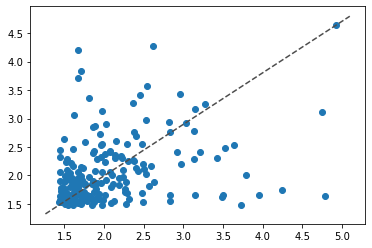

In [98]:
x = h_paper_data['pops_score']
y = h_combined_data["PoPS_Score"]

plt.scatter(x, y)
diag_line, = plt.plot(plt.xlim(), plt.ylim(), ls="--", c=".3")
print(np.corrcoef(x=x, y=y)[0, 1])

plt.show()

In [99]:
corr, _ = pearsonr(x, y)
corr

0.3209559711923178

In [73]:
#h_combined_ids = h_combined.ENSGID.values
#h_combined_ids

In [40]:
overlapping_genes_data = data[data.index.isin(h_combined_ids)]
#print(overlapping_genes.index)
overlapping_genes = overlapping_genes_data.index
total_overlap = overlapping_genes.shape[0]
print(f"Number of overlapping genes: {total_overlap}")

Number of overlapping genes: 196


## height dataset combined three features

In [46]:
h_combined3 = pd.read_csv("C:\\Users\\Gebruiker\\OneDrive\\Documents\\DSLS\\integrated_omics\\project\\POPS\\height_combined_three_tissues\\gene_output_height.preds", sep = '\t')

In [47]:
h_combined3

,ENSGID,PoPS_Score,Y,Y_proj,project_out_covariates_gene,feature_selection_gene,training_gene
0,ENSG00000186092,-0.303281,NaN,NaN,False,False,False
1,ENSG00000235249,-0.303281,NaN,NaN,False,False,False
2,ENSG00000185097,-0.303281,NaN,NaN,False,False,False
3,ENSG00000187634,-0.170060,NaN,NaN,False,False,False
4,ENSG00000188976,0.196716,NaN,NaN,False,False,False
...,...,...,...,...,...,...,...
18378,ENSG00000165724,0.042738,0.90812,-1.609128,True,True,True
18379,ENSG00000197070,0.263549,-0.49512,-2.704159,True,True,True
18380,ENSG00000203993,-0.115199,0.58284,-1.448793,True,True,True
18381,ENSG00000181090,1.012121,1.81330,-1.488304,True,True,True


In [48]:
h_combined3 = h_combined3.sort_values(by = 'PoPS_Score', ascending = False)
h_combined3

,ENSGID,PoPS_Score,Y,Y_proj,project_out_covariates_gene,feature_selection_gene,training_gene
5641,ENSG00000185650,2.315977,1.330700,-1.478658,True,True,True
15207,ENSG00000197061,2.053820,6.109400,3.678513,False,False,False
14032,ENSG00000164056,1.872157,0.898560,-1.660923,True,True,True
1135,ENSG00000143443,1.851647,NaN,NaN,False,False,False
15047,ENSG00000169045,1.783652,3.909400,1.101019,True,True,True
...,...,...,...,...,...,...,...
3280,ENSG00000110079,-1.475239,5.138000,2.087454,True,True,True
1370,ENSG00000179639,-1.655816,-1.894900,-4.797315,True,True,True
1347,ENSG00000158481,-1.687901,-0.806420,-2.258437,True,True,True
4405,ENSG00000167768,-1.768611,-0.061478,-2.911540,True,True,True


In [53]:
h_combined3 = h_combined3.iloc[:500]
h_combined3.head(5)

,ENSGID,PoPS_Score,Y,Y_proj,project_out_covariates_gene,feature_selection_gene,training_gene
5641,ENSG00000185650,2.315977,1.33070,-1.478658,True,True,True
15207,ENSG00000197061,2.053820,6.10940,3.678513,False,False,False
14032,ENSG00000164056,1.872157,0.89856,-1.660923,True,True,True
1135,ENSG00000143443,1.851647,NaN,NaN,False,False,False
15047,ENSG00000169045,1.783652,3.90940,1.101019,True,True,True


In [50]:
h_combined3_ids = h_combined.ENSGID.values
h_combined3_ids

array(['ENSG00000139219', 'ENSG00000164692', 'ENSG00000106034',
       'ENSG00000114737', 'ENSG00000156076', 'ENSG00000125347',
       'ENSG00000115457', 'ENSG00000138829', 'ENSG00000049323',
       'ENSG00000148120', 'ENSG00000162998', 'ENSG00000235162',
       'ENSG00000196739', 'ENSG00000162733', 'ENSG00000164330',
       'ENSG00000160789', 'ENSG00000144810', 'ENSG00000167244',
       'ENSG00000185532', 'ENSG00000116132', 'ENSG00000087460',
       'ENSG00000129757', 'ENSG00000110693', 'ENSG00000100906',
       'ENSG00000105655', 'ENSG00000066382', 'ENSG00000167779',
       'ENSG00000049089', 'ENSG00000142227', 'ENSG00000178031',
       'ENSG00000118523', 'ENSG00000104447', 'ENSG00000106070',
       'ENSG00000128573', 'ENSG00000157766', 'ENSG00000120833',
       'ENSG00000181722', 'ENSG00000068697', 'ENSG00000122786',
       'ENSG00000134294', 'ENSG00000034152', 'ENSG00000113721',
       'ENSG00000106809', 'ENSG00000169604', 'ENSG00000112562',
       'ENSG00000168542', 'ENSG000002042

In [52]:
#overlap of genes from combined data frame with three tissues with result of paper
overlapping_genes_data3 = data[data.index.isin(h_combined3_ids)]
#print(overlapping_genes.index)
overlapping_genes3 = overlapping_genes_data3.index
total_overlap = overlapping_genes3.shape[0]
print(f"Number of overlapping genes: {total_overlap}")

Number of overlapping genes: 196


## compare the results of selecting three features, with selecting all features combined

In [54]:
combined3_combined = h_combined3.ENSGID[ h_combined3.ENSGID.isin(h_combined.ENSGID)].values

In [55]:
combined3_combined = h_combined3.ENSGID[ h_combined3.ENSGID.isin(h_combined.ENSGID)].values
h_combined3_data = h_combined3[h_combined3.ENSGID.isin(combined3_combined)][["ENSGID", "PoPS_Score"]]
h_combined3_data

,ENSGID,PoPS_Score
15047,ENSG00000169045,1.783652
8892,ENSG00000171105,1.776745
7322,ENSG00000132386,1.771001
7816,ENSG00000131747,1.625409
14354,ENSG00000250722,1.599945
...,...,...
14654,ENSG00000125347,0.766774
3393,ENSG00000002330,0.765897
421,ENSG00000184007,0.757075
3507,ENSG00000172531,0.749885


In [66]:
h_combined3_data = h_combined3_data.sort_values(by = 'ENSGID', ascending = False)
h_combined3_data

,ENSGID,PoPS_Score
14354,ENSG00000250722,1.599945
15427,ENSG00000204256,1.033445
12419,ENSG00000198355,0.985320
8386,ENSG00000185624,1.066653
421,ENSG00000184007,0.757075
...,...,...
8341,ENSG00000035862,1.078850
4680,ENSG00000011465,0.967009
12777,ENSG00000004534,0.798802
10982,ENSG00000003402,1.011224


In [56]:
h_combined_data = h_combined[h_combined.ENSGID.isin(combined3_combined)][["ENSGID", "PoPS_Score"]]
h_combined_data

,ENSGID,PoPS_Score
16513,ENSG00000164692,4.268547
14654,ENSG00000125347,3.712567
11057,ENSG00000115457,3.699302
10911,ENSG00000162998,3.402432
1448,ENSG00000162733,3.247120
...,...,...
11049,ENSG00000115414,1.522557
421,ENSG00000184007,1.519560
4745,ENSG00000166598,1.507876
4761,ENSG00000136026,1.488334


In [65]:
h_combined_data = h_combined_data.sort_values(by = 'ENSGID', ascending = False)
h_combined_data

,ENSGID,PoPS_Score
14354,ENSG00000250722,2.102674
15427,ENSG00000204256,1.667555
12419,ENSG00000198355,1.830305
8386,ENSG00000185624,1.903667
421,ENSG00000184007,1.519560
...,...,...
8341,ENSG00000035862,1.844777
4680,ENSG00000011465,2.143840
12777,ENSG00000004534,1.650041
10982,ENSG00000003402,1.488302


0.023449116201839555


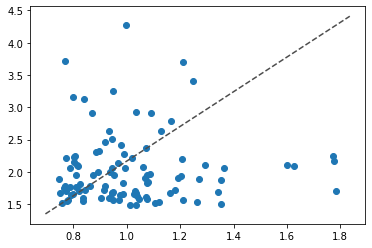

In [67]:
x = h_combined3_data['PoPS_Score']
y = h_combined_data["PoPS_Score"]

plt.scatter(x, y)
diag_line, = plt.plot(plt.xlim(), plt.ylim(), ls="--", c=".3")
print(np.corrcoef(x=x, y=y)[0, 1])

plt.show()

In [68]:
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import numpy as np
 
corr, _ = pearsonr(x, y)
corr

0.023449116201839565

## height dataset from one gene feature (human bone marrow)

In [102]:
h_hbn = pd.read_csv("C:\\Users\\Gebruiker\\OneDrive\\Documents\\DSLS\\integrated_omics\\project\\POPS\\step2\\out_hbn_height\\500_genes_priortised_height.txt", sep = '\t')
h_hbn

,Unnamed: 0,ENSGID,PoPS_Score,Y,Y_proj,project_out_covariates_gene,feature_selection_gene,training_gene
0,15207,ENSG00000197061,3.069647,6.10940,3.678513,False,False,False
1,7322,ENSG00000132386,2.692846,7.80640,4.850113,True,True,True
2,12019,ENSG00000160298,2.483296,2.56770,-0.174273,True,True,True
3,15258,ENSG00000184357,2.399169,5.04230,3.305963,False,False,False
4,14032,ENSG00000164056,2.261013,0.89856,-1.660923,True,True,True
...,...,...,...,...,...,...,...,...
495,7463,ENSG00000129255,1.097266,6.10940,3.559025,True,True,True
496,2180,ENSG00000165406,1.096728,0.50224,-2.599201,True,True,True
497,7922,ENSG00000108799,1.096618,7.38430,4.536058,True,True,True
498,1328,ENSG00000143321,1.096323,6.39320,3.572586,True,True,True


## compare the result of one feature(hbn) with combined all features 

In [103]:
h_hbn_combined = h_hbn.ENSGID[ h_hbn.ENSGID.isin(h_combined.ENSGID)].values

In [104]:
h_hbn_data = h_hbn[h_hbn.ENSGID.isin(h_hbn_combined)][["ENSGID", "PoPS_Score"]]
h_hbn_data

,ENSGID,PoPS_Score
1,ENSG00000132386,2.692846
21,ENSG00000162599,1.931979
22,ENSG00000169045,1.900149
23,ENSG00000106333,1.891374
27,ENSG00000250722,1.829171
...,...,...
447,ENSG00000111642,1.119776
462,ENSG00000155090,1.115751
464,ENSG00000084207,1.112149
482,ENSG00000113721,1.102071


In [105]:
h_hbn_data = h_hbn_data.sort_values(by = 'ENSGID', ascending = False)
h_hbn_data

,ENSGID,PoPS_Score
352,ENSG00000257923,1.185089
362,ENSG00000253293,1.175703
27,ENSG00000250722,1.829171
384,ENSG00000235162,1.162593
186,ENSG00000233608,1.365854
...,...,...
395,ENSG00000065978,1.153094
108,ENSG00000035862,1.516842
302,ENSG00000034152,1.235755
258,ENSG00000011465,1.274988


In [107]:
h_combined_data = h_combined[h_combined.ENSGID.isin(h_hbn_combined)][["ENSGID", "PoPS_Score"]]
h_combined_data

,ENSGID,PoPS_Score
16513,ENSG00000164692,4.268547
11057,ENSG00000115457,3.699302
10911,ENSG00000162998,3.402432
4759,ENSG00000235162,3.351985
1448,ENSG00000162733,3.247120
...,...,...
11049,ENSG00000115414,1.522557
421,ENSG00000184007,1.519560
17097,ENSG00000147454,1.512035
4745,ENSG00000166598,1.507876


In [108]:
h_combined_data = h_combined_data.sort_values(by = 'ENSGID', ascending = False)
h_combined_data

,ENSGID,PoPS_Score
16623,ENSG00000257923,2.546392
16239,ENSG00000253293,1.999234
14354,ENSG00000250722,2.102674
4759,ENSG00000235162,3.351985
11230,ENSG00000233608,2.042742
...,...,...
561,ENSG00000065978,1.953446
8341,ENSG00000035862,1.844777
7614,ENSG00000034152,2.631758
4680,ENSG00000011465,2.143840


-0.0396200372719572


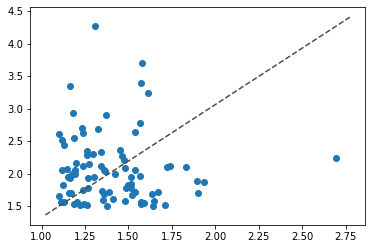

In [109]:
x = h_hbn_data['PoPS_Score']
y = h_combined_data["PoPS_Score"]

plt.scatter(x, y)
diag_line, = plt.plot(plt.xlim(), plt.ylim(), ls="--", c=".3")
print(np.corrcoef(x=x, y=y)[0, 1])

plt.show()

In [110]:
corr, _ = pearsonr(x, y)
corr

-0.03962003727195719